In [34]:
import pandas as pd  

df = pd.read_csv('./final-dataset.csv')  
display(df)

,s_num_nodes,s_weighted_mean_degree,s_num_component,s_avg_clustering_coef,s_largest_component,s_graph_density,t_num_dev_nodes,t_num_file_nodes,t_num_dev_per_file,t_num_file_per_dev,...,proj_name,month,st_num_dev,t_net_overlap,s_net_overlap,stars,forks,pull_requests,pScore,popular
0,13,74.153846,1,0.687463,13,0.384615,2,201,1.059701,106.500000,...,abdera,0,1,0.000000,0.000000,18,24,4,58,0
1,15,34.133333,1,0.392751,15,0.247619,3,218,1.252294,91.000000,...,abdera,1,2,0.191358,0.196429,18,24,4,58,0
2,18,22.000000,2,0.399824,14,0.156863,3,171,1.140351,65.000000,...,abdera,2,2,0.147436,0.140000,18,24,4,58,0
3,15,22.666667,1,0.449899,15,0.228571,1,195,1.000000,195.000000,...,abdera,3,0,0.235897,0.187500,18,24,4,58,0
4,16,19.000000,2,0.163095,14,0.141667,2,72,1.069444,38.500000,...,abdera,4,1,0.139706,0.170732,18,24,4,58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515,6,8.000000,1,0.388889,6,0.466667,3,30,1.033333,10.333333,...,zipkin,4,1,0.000000,0.142857,17138,3102,30,21140,1
5516,17,16.470588,1,0.332156,17,0.161765,6,91,1.076923,16.333333,...,zipkin,5,2,0.115385,0.137931,17138,3102,30,21140,1
5517,11,8.000000,1,0.308081,11,0.218182,9,831,1.599278,147.666667,...,zipkin,6,2,0.050420,0.235294,17138,3102,30,21140,1
5518,16,15.750000,1,0.283491,16,0.216667,7,1068,1.011236,154.285714,...,zipkin,7,2,0.269295,0.157895,17138,3102,30,21140,1


# RQ#2 - Haseeb & Aayusha


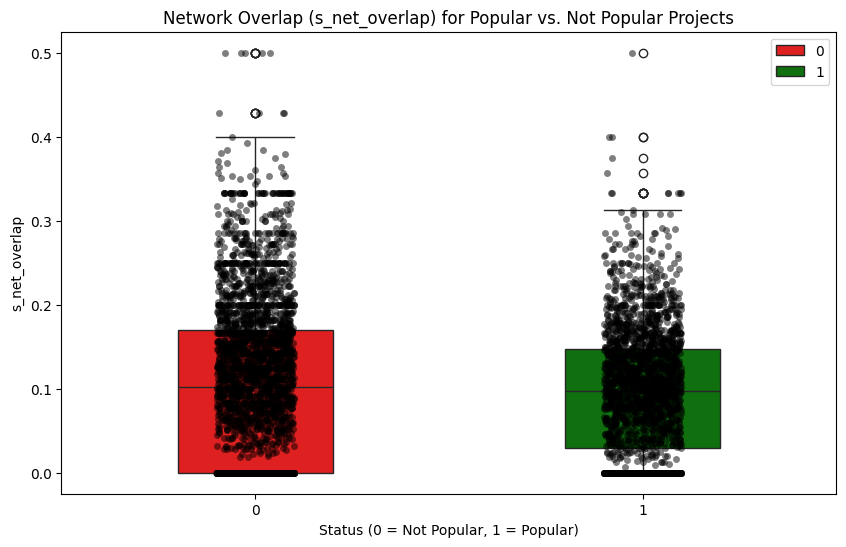

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='popular', y='s_net_overlap', hue='popular', palette={0: 'red', 1: 'green'}, width=0.4)
sns.stripplot(data=df, x='popular', y='s_net_overlap', jitter=True, alpha=0.5, color='black')
plt.title("Network Overlap (s_net_overlap) for Popular vs. Not Popular Projects")
plt.xlabel("Status (0 = Not Popular, 1 = Popular)")
plt.ylabel("s_net_overlap")
plt.show()

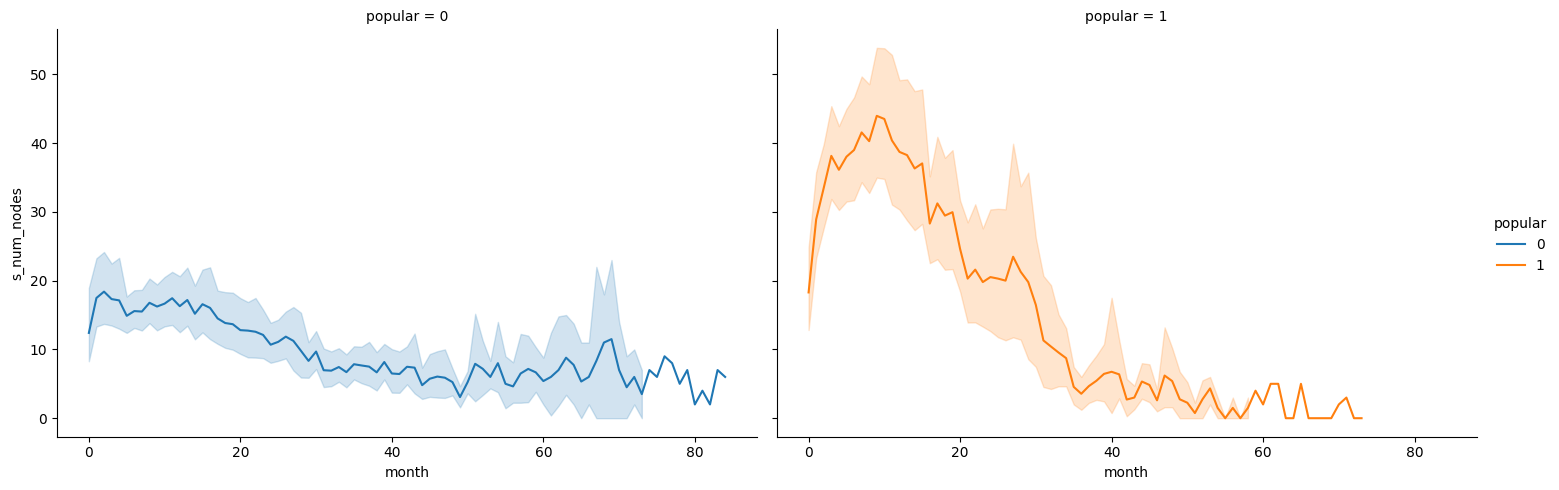

In [36]:
g = sns.FacetGrid(df, col="popular", hue="popular", height=5, aspect=1.5)
g.map_dataframe(sns.lineplot, x="month", y="s_num_nodes")
g.add_legend()
plt.show()

<Figure size 1500x1000 with 0 Axes>

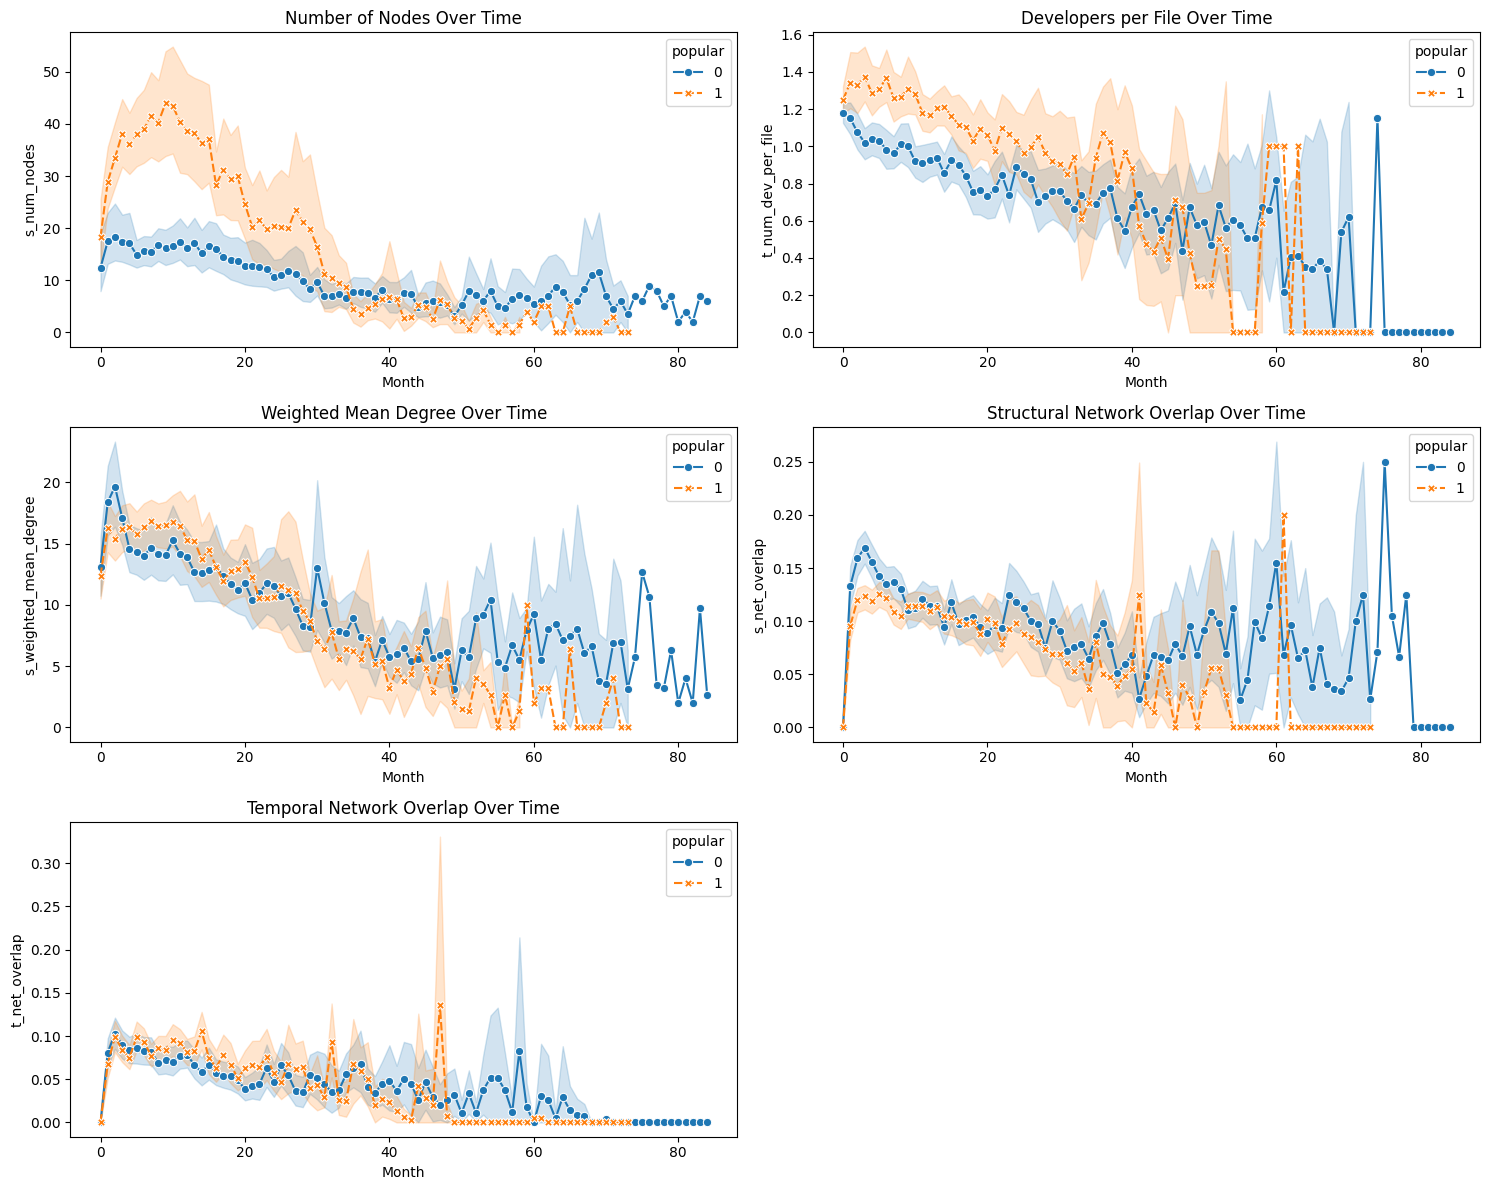

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

metrics = ['s_num_nodes', 't_num_dev_per_file', 's_weighted_mean_degree', 's_net_overlap', 't_net_overlap']
titles = ["Number of Nodes Over Time", "Developers per File Over Time",
          "Weighted Mean Degree Over Time", "Structural Network Overlap Over Time", "Temporal Network Overlap Over Time"]

fig, axes = plt.subplots(3, 2, figsize=(15, 12))

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    sns.lineplot(data=df, x='month', y=metric, hue='popular', style='popular', markers=True, ax=ax)
    ax.set_title(titles[i])
    ax.set_xlabel("Month")
    ax.set_ylabel(metric)

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

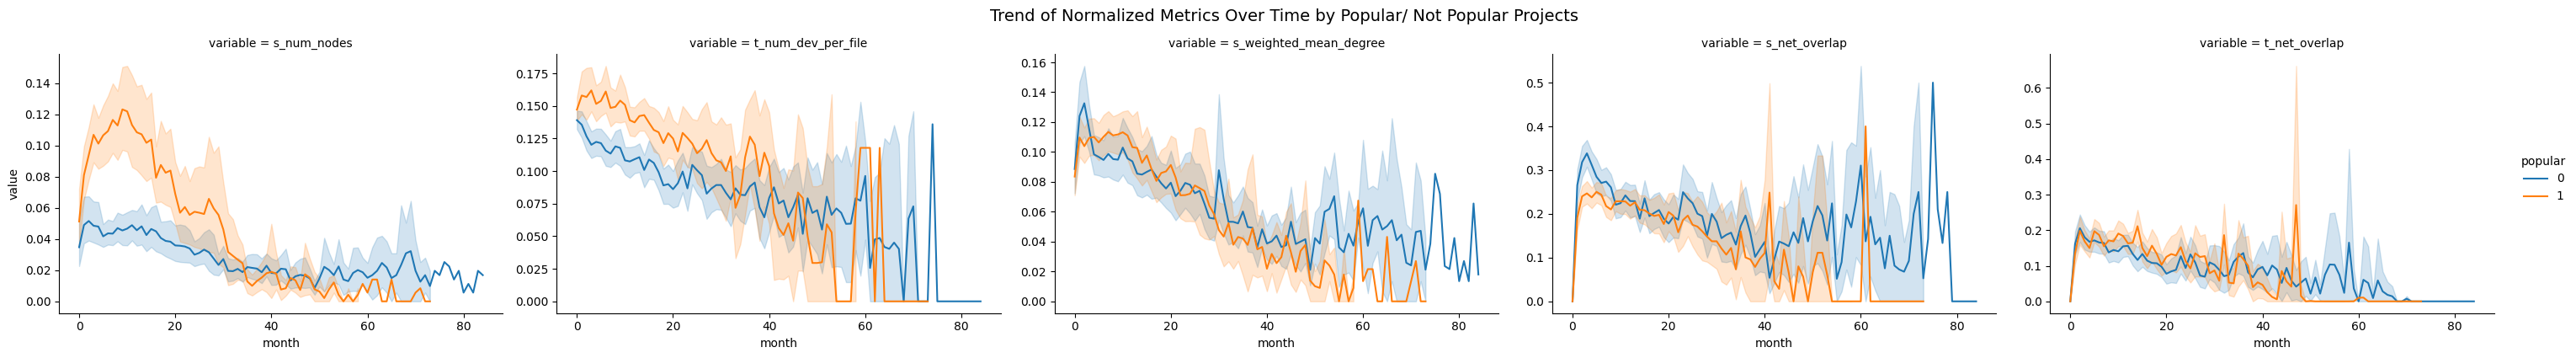

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

metrics = ['s_num_nodes', 't_num_dev_per_file', 's_weighted_mean_degree', 's_net_overlap', 't_net_overlap']

scaler = MinMaxScaler()
df[metrics] = scaler.fit_transform(df[metrics])

g = sns.FacetGrid(df.melt(id_vars=['month', 'popular'], value_vars=metrics), col="variable", hue="popular", height=4, aspect=1.5, sharex=True, sharey=False)
g.map_dataframe(sns.lineplot, x="month", y="value")
g.add_legend()
plt.suptitle("Trend of Normalized Metrics Over Time by Popular/ Not Popular Projects", y=1.05, fontsize=14)
plt.show()

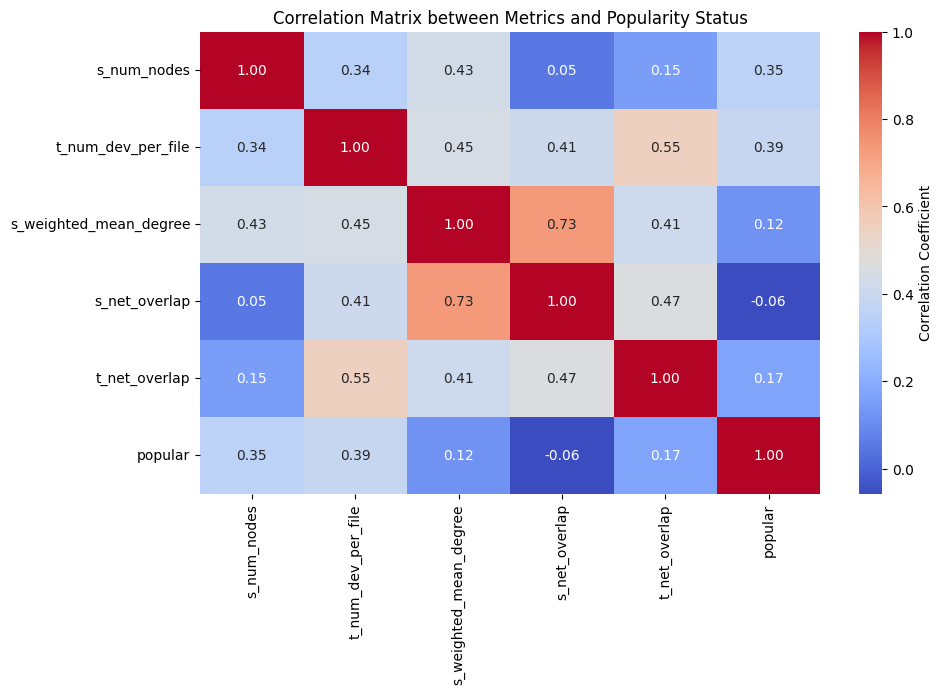

In [39]:
# #RQ2 - CORRELATION MATRIX

# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy.stats import pearsonr

# # Assuming your final dataframe is df, with the columns:
# # 'proj_name', 's_num_nodes', 't_num_dev_per_file', 's_weighted_mean_degree', 's_net_overlap', 't_net_overlap', and 'graduated'

# # Aggregate the metrics by project (proj_name) and calculate the mean across months
# aggregated_df = df.groupby('proj_name').agg({
#     's_num_nodes': 'mean',
#     't_num_dev_per_file': 'mean',
#     's_weighted_mean_degree': 'mean',
#     's_net_overlap': 'mean',
#     't_net_overlap': 'mean',
#     'graduated': 'mean'  # Assuming 'graduated' is a binary variable (0 or 1)
# }).reset_index()

# # Calculate the correlation matrix to understand relationships between the variables
# corr_matrix = aggregated_df[['s_num_nodes', 't_num_dev_per_file', 's_weighted_mean_degree',
#                              's_net_overlap', 't_net_overlap', 'graduated']].corr()

# # Visualize the correlation matrix
# plt.figure(figsize=(10, 6))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
# plt.title('Correlation Matrix between Metrics and Graduated Status')
# plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

ROLLING_WINDOW = 12

df['month'] = pd.to_datetime(df['month'])
df_sorted = df.sort_values(by=['proj_name', 'month'])
df_rolling = df_sorted.groupby('proj_name').rolling(ROLLING_WINDOW, on='month').mean().reset_index()

aggregated_df = df_rolling.groupby('proj_name').agg({
    's_num_nodes': 'mean',
    't_num_dev_per_file': 'mean',
    's_weighted_mean_degree': 'mean',
    's_net_overlap': 'mean',
    't_net_overlap': 'mean',
    'popular': 'mean'
}).reset_index()

corr_matrix = aggregated_df[['s_num_nodes', 't_num_dev_per_file', 's_weighted_mean_degree',
                             's_net_overlap', 't_net_overlap', 'popular']].corr()

plt.figure(figsize=(10, 6))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix between Metrics and Popularity Status')
plt.show()

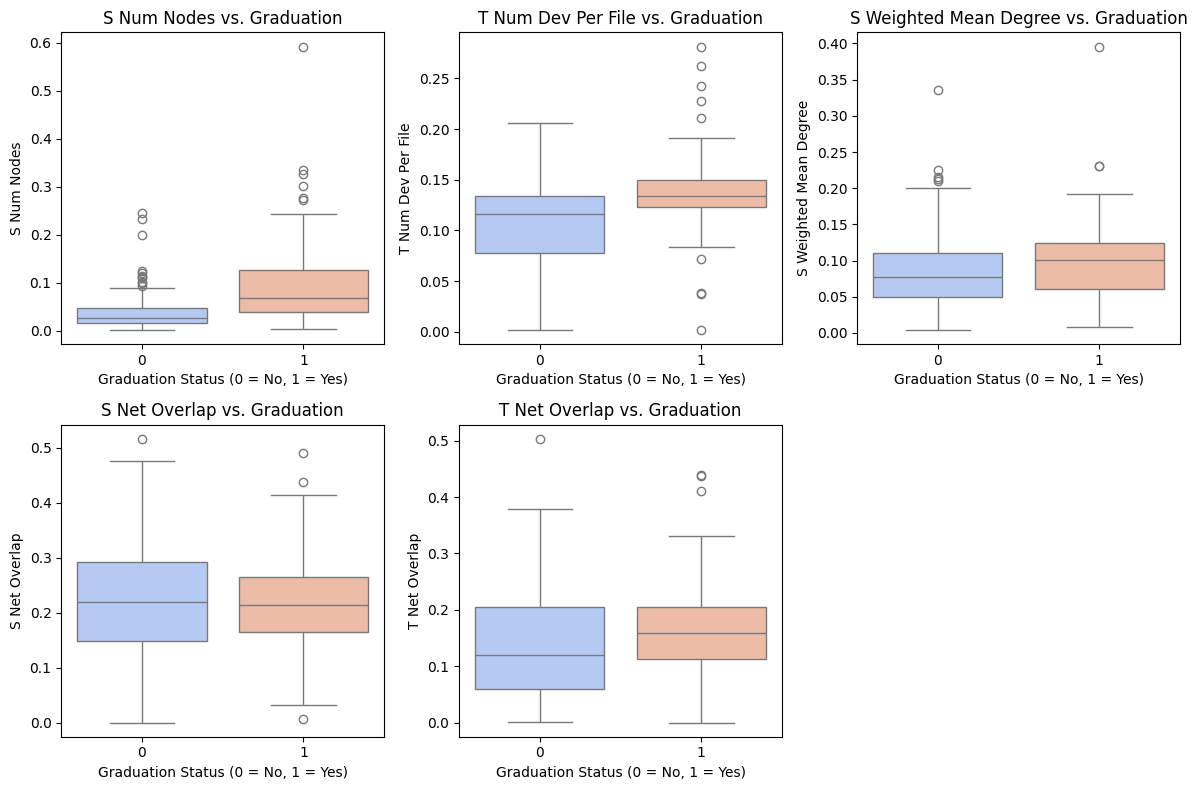

In [40]:
# #RQ2 -BOX PLOT

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ROLLING_WINDOW = 12
df['month'] = pd.to_datetime(df['month'])
df_sorted = df.sort_values(by=['proj_name', 'month'])
df_rolling = df_sorted.groupby('proj_name').rolling(ROLLING_WINDOW, on='month').mean().reset_index()
aggregated_df = df_rolling.groupby('proj_name').agg({
    's_num_nodes': 'mean',
    't_num_dev_per_file': 'mean',
    's_weighted_mean_degree': 'mean',
    's_net_overlap': 'mean',
    't_net_overlap': 'mean',
    'popular': 'mean'
}).reset_index()
aggregated_df['popular'] = aggregated_df['popular'].fillna(0).round().astype(int)
metrics = ['s_num_nodes', 't_num_dev_per_file', 's_weighted_mean_degree', 's_net_overlap', 't_net_overlap']
plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='popular', y=metric, data=aggregated_df, hue='popular', palette="coolwarm", legend=False)
    plt.xlabel("Graduation Status (0 = No, 1 = Yes)")
    plt.ylabel(metric.replace('_', ' ').title())
    plt.title(f"{metric.replace('_', ' ').title()} vs. Graduation")
plt.tight_layout()
plt.show()